<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/numba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.io import wavfile
from IPython.display import Audio

In [2]:
Nx = 101  # Guitar string positions
Nt = 500000  # Time length
L = 0.7  # Guitar string length
dx = L / (Nx - 1)  # Length delta
f = 220  # f = c / 2 * L
c = 2 * L * f  # Speed of the wave
dt = 5e-6  # Time delta
l = 2e-6  # characteristic length
gamma = 5e-5  # damping constant

In [3]:
ya = np.linspace(0, 0.01, 70)
yb = np.linspace(0.01, 0, 31)
y0 = np.concatenate([ya, yb])

In [4]:
sol = np.zeros((Nt, Nx))

In [5]:
sol[0] = y0
sol[1] = y0

In [6]:
@numba.jit("f8[:,:](f8[:,:], i8, i8, f8, f8, f8, f8)", nopython=True, nogil=True)
def compute_d(d, times, length, dt, dx, l, gamma):
    for t in range(1, times - 1):
        for i in range(2, length - 2):
            outer_fact = (1 / (c**2 * dt**2) + gamma / (2 * dt))**(-1)
            p1 = 1 / dx**2 * (d[t][i - 1] - 2 * d[t][i] + d[t][i + 1])
            p2 = 1 / (c**2 * dt**2) * (d[t - 1][i] - 2 * d[t][i])
            p3 = gamma / (2 * dt) * d[t - 1][i]
            p4 = l**2 / dx**4 * (d[t][i + 2] - 4 * d[t][i + 1] + 6 * d[t][i] - 4 * d[t][i - 1] + d[t][i - 2])
            d[t + 1][i] = outer_fact * (p1 - p2 + p3 - p4)
    return d

In [7]:
sol = compute_d(sol, Nt, Nx, dt, dx, l, gamma)

Text(0, 0.5, 'Amplitude')

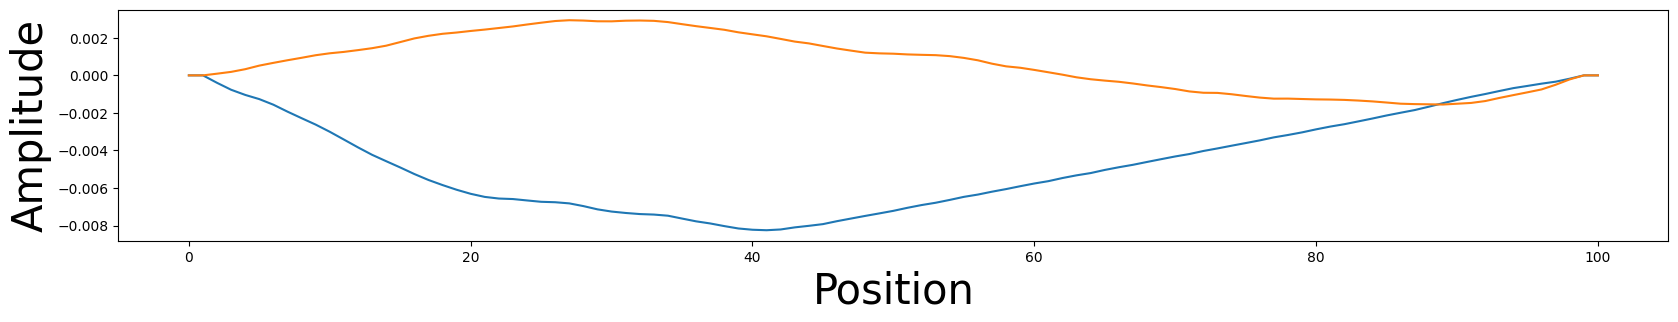

In [8]:
plt.figure(figsize=(20, 3))
plt.plot(sol[500])
plt.plot(sol[10000])
plt.xlabel('Position', fontsize=30)
plt.ylabel('Amplitude', fontsize=30)

In [9]:
len(sol[::10,:])

50000

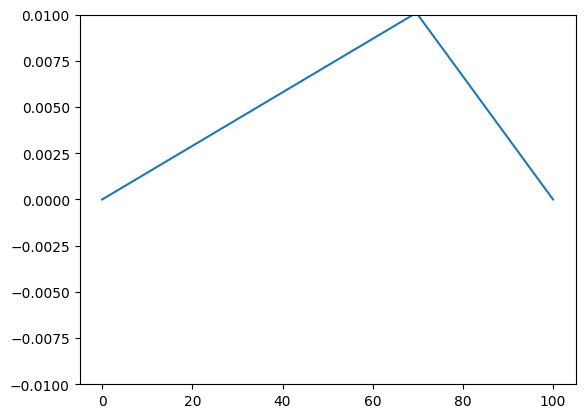

In [10]:
def animate(i):
    ax.clear()
    ax.plot(sol[i * 10])
    ax.set_ylim(-0.01, 0.01)

fig, ax = plt.subplots(1, 1)
ax.set_ylim(-0.01, 0.01)
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('string.gif', writer='pillow', fps=20)

In [11]:
def get_integral_fast(n):
    sin_arr = np.sin(n * np.pi * np.linspace(0, 1, 101))
    return np.multiply(sol, sin_arr).sum(axis=1)

In [12]:
hms = [get_integral_fast(n) for n in range(10)]

In [13]:
all_harmonics = True

if all_harmonics:
    tot = sol.sum(axis=1)[::10] # all harmonics
else:
    tot = sum(hms)[::10] # only first 10 harmonics

tot = tot.astype(np.float32)

In [14]:
wavfile.write('sound.wav',20000,tot)

In [15]:
Audio('sound.wav')

https://www.youtube.com/watch?v=MavAU3adGk4
https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid5.ipynb